# About the Dataset

1.id: unique id for a news article

2.title: the title of a news article

3.author: author of the news article

4.text: the text of the article, could be incomplete

5.label: a label that marks whether the news article is real or fake, if 1 fake news else if 0 real news

# Importing the dependencies

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import re # re for regular expression it is very useful for searching the text in the document.
from nltk.corpus import stopwords #nltk: natural languaue tool kit and corpus meanse the body of the particular text or important content of the text. Stopwords are those words which doesn't matter or important in the text.
from nltk.stem.porter import PorterStemmer #We perform the process called stemming. Stemming is the process in which we take a word and remove the prefix and suffix of the word and returns the root word of it.
from sklearn.feature_extraction.text import TfidfVectorizer #used to convert text into feature vectors.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [36]:
import nltk
nltk.download('stopwords') #Download a stopword from nltk

[nltk_data] Downloading package stopwords to /home/ishita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
#Lets print downloaded stopwords of english.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Pre-processing 

In [38]:
#loading the dataset to a pandas Dataframe
news_dataset = pd.read_csv('/home/ishita/Documents/datasets/fake_news_train.csv')

In [39]:
news_dataset.shape

(20800, 5)

In [40]:
#print first five rows fo the dataset
news_dataset.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [41]:
# count number of missing values in dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [42]:
# We have large dataset so we can replace the missing values by empty string
news_dataset = news_dataset.fillna('')

In [43]:
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

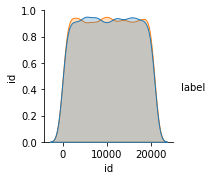

In [44]:
sns.pairplot(news_dataset,hue='label')

In [45]:
# combining title and author name in new feature called content
news_dataset['content']= news_dataset['author']+' '+news_dataset['title']

In [46]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [47]:
# We use the content feature and labels for prediction.
#seperating the data and label
X = news_dataset.drop(columns='label',axis=1)
Y = news_dataset['label']

print(X)
print(Y)

# Stemming

Stemming is the process of reducing a word to its root word


for example root word for actor, actress, acting is act

In [48]:
port_stem = PorterStemmer()

In [49]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) #remove all the numbers or puntuation sign from the the content and replace it with space as shown later in place of older content we replace from new content, here re is regular expression and sub is substitution.
    stemmed_content = stemmed_content.lower()  #convert all words to lowercase letter
    stemmed_content = stemmed_content.split() #all these sentences are splited and converted into list.
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #take each word and convert it into root word and also remove all the stopwords
    stemmed_content = ' '.join(stemmed_content) #joining all words and we have a processed content.
    return stemmed_content #finally we return the content.

In [50]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [51]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [52]:
#seperating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [53]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [54]:
print(Y)

[1 0 1 ... 0 1 1]


In [55]:
Y.shape

(20800,)

In [56]:
#Now the content is all text value and computer cannot able to understand the texual language so we need to convert it into meaningful numbers (feature vector).
#converting the texual data to numerical data
vectorizer = TfidfVectorizer() # Tf stands for term frequency (number of time that word is reapeting in the text or paragraph) and idf stands for inverse document frequency (some time the word repeate several times dosen't have meaning in it for example in reviewof any movie the movie name is repeated several times which donot have any meaning
vectorizer.fit(X)

X = vectorizer.transform(X)

In [57]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting the dataset to training and test data


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Training the Model: Logistic Regression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train, Y_train) #train using training data.

LogisticRegression()

# Evaluation

accuracy score

In [61]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [62]:
print('Accuracy score of the training data: ',training_data_accuracy)

Accuracy score of the training data:  0.9865985576923076


In [63]:
#accuracy score on the training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [64]:
print('Accuracy score of the test data: ',test_data_accuracy)

Accuracy score of the test data:  0.9790865384615385


# Making a Predictive System

In [65]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('The news is Real')
else:
    print('The news is Fake')

[0]
The news is Real


In [66]:
print(Y_test[3])

0


# Creating pickle file

In [67]:
import pickle
pickle.dump(vectorizer, open('vector.pkl','wb'))
pickle.dump(model, open('model.pkl','wb'))
vector_form = pickle.load(open('vector.pkl','rb'))
load_model = pickle.load(open('model.pkl','rb'))